In [6]:
#import modules

# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import random; random.seed(10) # pre-setting seed
from scipy import stats
from scipy import optimize  # for Box-Cox calculations
from scipy.stats import norm
from matplotlib import rcParams # for ease of resizing plots
# Numpy version matters for scipy

# For model fitting
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from fitter import Fitter # might require install, numpy version matters
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import metrics
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
from BorutaShap import BorutaShap # use .py file version

# Subset regressions & feature selection
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


# Heteroskedasticity
from statsmodels.stats.diagnostic import het_breuschpagan, het_white, het_goldfeldquandt

# Missing data imputation
from sklearn.impute import KNNImputer
from statsmodels.imputation import mice

# Question 1

### Part a)

In [40]:
raw_data = pd.read_csv(r'C:\UCLA MQE\Quarter 1\Econ 430\data_compiled.csv')
raw_data

Entity  per_capita_co2_emissions fossil_fuel_subsidies  \
0          Afghanistan                     0.302                2.7350   
1              Albania                     1.737                   NaN   
2              Algeria                     3.972              348.8767   
3       American Samoa                       NaN                   NaN   
4              Andorra                     4.673                   NaN   
..                 ...                       ...                   ...   
234            Vietnam                     3.625               18.5067   
235  Wallis and Futuna                     2.258                   NaN   
236              Yemen                     0.342                0.0050   
237             Zambia                     0.440               10.4550   
238           Zimbabwe                     0.523                0.0000   

       population  per_capita_gdp  Urbanization  renewable_energy_share  \
0    4.067801e+07        1742.307       26.3187                     NaN   
1    2.829639e+06       14455.506       62.9600                     NaN   
2    4.546757e+07       11024.048       74.2553                  0.2550   
3    4.838533e+04             NaN       87.1727                     NaN   
4    7.965500e+04             NaN       87.8617                     NaN   
..            ...             ...           ...                     ...   
234  9.965598e+07       10825.124       38.0527                 24.5854   
235  1.149500e+04             NaN           NaN                     NaN   
236  3.825130e+07             NaN       38.5473                     NaN   
237  2.016017e+07        3278.982       45.1940                     NaN   
238  1.606904e+07        2104.474       32.3133                     NaN   

     per_cap_energy_con  gii_technology  industry_share  
0                   NaN            0.00            16.1  
1                   NaN           11.43            21.2  
2             15942.188            7.97            38.0  
3                   NaN            0.00             NaN  
4                   NaN            0.00            11.4  
..                  ...             ...             ...  
234           12938.016           29.03             NaN  
235                 NaN             NaN             NaN  
236                 NaN             NaN             NaN  
237                 NaN            8.70            36.1  
238                 NaN           12.30            46.9  

[239 rows x 10 columns]

In [41]:
#cleaning_data

continents = pd.read_csv(r'C:\UCLA MQE\Quarter 1\Econ 430\continents-according-to-our-world-in-data.csv')

raw_data_cleaned = pd.merge(raw_data, continents, on = 'Entity', how = 'inner')
raw_data_cleaned = raw_data_cleaned.drop(['Code', 'Year'], axis = 1)
raw_data_cleaned

Entity  per_capita_co2_emissions fossil_fuel_subsidies  \
0          Afghanistan                     0.302                2.7350   
1              Albania                     1.737                   NaN   
2              Algeria                     3.972              348.8767   
3       American Samoa                       NaN                   NaN   
4              Andorra                     4.673                   NaN   
..                 ...                       ...                   ...   
231            Vietnam                     3.625               18.5067   
232  Wallis and Futuna                     2.258                   NaN   
233              Yemen                     0.342                0.0050   
234             Zambia                     0.440               10.4550   
235           Zimbabwe                     0.523                0.0000   

       population  per_capita_gdp  Urbanization  renewable_energy_share  \
0    4.067801e+07        1742.307       26.3187                     NaN   
1    2.829639e+06       14455.506       62.9600                     NaN   
2    4.546757e+07       11024.048       74.2553                  0.2550   
3    4.838533e+04             NaN       87.1727                     NaN   
4    7.965500e+04             NaN       87.8617                     NaN   
..            ...             ...           ...                     ...   
231  9.965598e+07       10825.124       38.0527                 24.5854   
232  1.149500e+04             NaN           NaN                     NaN   
233  3.825130e+07             NaN       38.5473                     NaN   
234  2.016017e+07        3278.982       45.1940                     NaN   
235  1.606904e+07        2104.474       32.3133                     NaN   

     per_cap_energy_con  gii_technology  industry_share Continent  
0                   NaN            0.00            16.1      Asia  
1                   NaN           11.43            21.2    Europe  
2             15942.188            7.97            38.0    Africa  
3                   NaN            0.00             NaN   Oceania  
4                   NaN            0.00            11.4    Europe  
..                  ...             ...             ...       ...  
231           12938.016           29.03             NaN      Asia  
232                 NaN             NaN             NaN   Oceania  
233                 NaN             NaN             NaN      Asia  
234                 NaN            8.70            36.1    Africa  
235                 NaN           12.30            46.9    Africa  

[236 rows x 11 columns]

In [42]:
raw_data_cleaned['fossil_fuel_subsidies'] = pd.to_numeric(raw_data_cleaned['fossil_fuel_subsidies'], errors='coerce')
raw_data_cleaned.describe()

per_capita_co2_emissions  fossil_fuel_subsidies    population  \
count                214.000000             184.000000  2.360000e+02   
mean                   4.562467              94.613912  3.399101e+07   
std                    5.417172             183.765716  1.366796e+08   
min                    0.037000               0.000000  5.136670e+02   
25%                    0.953250               0.470000  3.950424e+05   
50%                    3.028000              19.435850  5.469677e+06   
75%                    6.066750              86.658325  2.263032e+07   
max                   38.206000             999.630000  1.425899e+09   

       per_capita_gdp  Urbanization  renewable_energy_share  \
count      194.000000    212.000000               67.000000   
mean     21614.618784     61.799927               17.531197   
std      21864.780226     23.718189               13.960558   
min        711.200000     13.461000                0.242400   
25%       5212.770000     43.271450                7.660450   
50%      13961.426000     63.089350               13.941600   
75%      32029.275750     81.414100               25.811000   
max     116177.270000    100.000000               71.720000   

       per_cap_energy_con  gii_technology  industry_share  
count           69.000000      188.000000      170.000000  
mean         36003.536623       15.805585       26.152941  
std          26172.341555       16.595443       13.103499  
min           2957.727000        0.000000        2.400000  
25%          18771.568000        0.000000       18.025000  
50%          31330.951000       12.185000       24.200000  
75%          43647.654000       25.215000       31.800000  
max         153713.570000       65.500000       85.000000

In [43]:
#Trying KNN

raw_data_knn_test = raw_data_cleaned.copy()

raw_data_knn_test = raw_data_knn_test.drop(['Entity'], axis = 1)

# One-hot encode categorical variables and apply KNN imputation
raw_data_knn_test = pd.get_dummies(raw_data_knn_test, columns=['Continent'])
raw_data_knn_test


# Create a KNNImputer instance
imputer = KNNImputer(n_neighbors= 3)

# Impute missing values
raw_data_knn_test_imputed = imputer.fit_transform(raw_data_knn_test)

# Convert the result back to a dataframe
raw_data_knn_test_imputed = pd.DataFrame(raw_data_knn_test_imputed, columns=raw_data_knn_test.columns)

(raw_data_knn_test_imputed)

raw_data_cleaned = raw_data_knn_test_imputed

raw_data_cleaned.isna().sum()

per_capita_co2_emissions    0
fossil_fuel_subsidies       0
population                  0
per_capita_gdp              0
Urbanization                0
renewable_energy_share      0
per_cap_energy_con          0
gii_technology              0
industry_share              0
Continent_Africa            0
Continent_Asia              0
Continent_Europe            0
Continent_North America     0
Continent_Oceania           0
Continent_South America     0
dtype: int64

In [44]:
raw_data_cleaned = raw_data_cleaned.drop(['Continent_Africa', 
                                           'Continent_Oceania', 'Continent_North America', 
                                           'Continent_Europe', 'Continent_South America', 'Continent_Asia'], 
                                          axis=1)

In [5]:
#Imputing Data

diff_mean_median = (raw_data_cleaned.mean()-raw_data_cleaned.median())/raw_data_cleaned.median()


for i in raw_data_cleaned.columns:
    if i in ['Entity', 'Continent']:
        continue
    raw_data_cleaned[i] = raw_data_cleaned[i].fillna(raw_data_cleaned.groupby(['Continent'])[i].transform('median'))

raw_data_cleaned


Entity  per_capita_co2_emissions  fossil_fuel_subsidies  \
0          Afghanistan                     0.302                2.73500   
1              Albania                     1.737               64.75665   
2              Algeria                     3.972              348.87670   
3       American Samoa                     2.258                0.20500   
4              Andorra                     4.673               64.75665   
..                 ...                       ...                    ...   
231            Vietnam                     3.625               18.50670   
232  Wallis and Futuna                     2.258                0.20500   
233              Yemen                     0.342                0.00500   
234             Zambia                     0.440               10.45500   
235           Zimbabwe                     0.523                0.00000   

       population  per_capita_gdp  Urbanization  renewable_energy_share  \
0    4.067801e+07       1742.3070       26.3187                 7.34280   
1    2.829639e+06      14455.5060       62.9600                18.77150   
2    4.546757e+07      11024.0480       74.2553                 0.25500   
3    4.838533e+04       5742.9600       87.1727                27.90035   
4    7.965500e+04      38526.8555       87.8617                18.77150   
..            ...             ...           ...                     ...   
231  9.965598e+07      10825.1240       38.0527                24.58540   
232  1.149500e+04       5742.9600       64.7753                27.90035   
233  3.825130e+07      14479.3675       38.5473                 7.34280   
234  2.016017e+07       3278.9820       45.1940                 4.79510   
235  1.606904e+07       2104.4740       32.3133                 4.79510   

     per_cap_energy_con  gii_technology  industry_share Continent  
0            31745.8180           0.000            16.1      Asia  
1            33148.7030          11.430            21.2    Europe  
2            15942.1880           7.970            38.0    Africa  
3            54075.8155           0.000            16.1   Oceania  
4            33148.7030           0.000            11.4    Europe  
..                  ...             ...             ...       ...  
231          12938.0160          29.030            32.9      Asia  
232          54075.8155           0.000            16.1   Oceania  
233          31745.8180          17.415            32.9      Asia  
234          12864.8300           8.700            36.1    Africa  
235          12864.8300          12.300            46.9    Africa  

[236 rows x 11 columns]

In [7]:
diff_mean_median = (raw_data_cleaned.mean()-raw_data_cleaned.median())/raw_data_cleaned.median()
diff_mean_median

per_capita_co2_emissions    0.276539
fossil_fuel_subsidies       5.306333
population                  5.214446
per_capita_gdp              0.504907
Urbanization               -0.056270
renewable_energy_share      0.335747
per_cap_energy_con         -0.049750
gii_technology              0.247663
industry_share              0.057728
Continent_Asia                   inf
dtype: float64

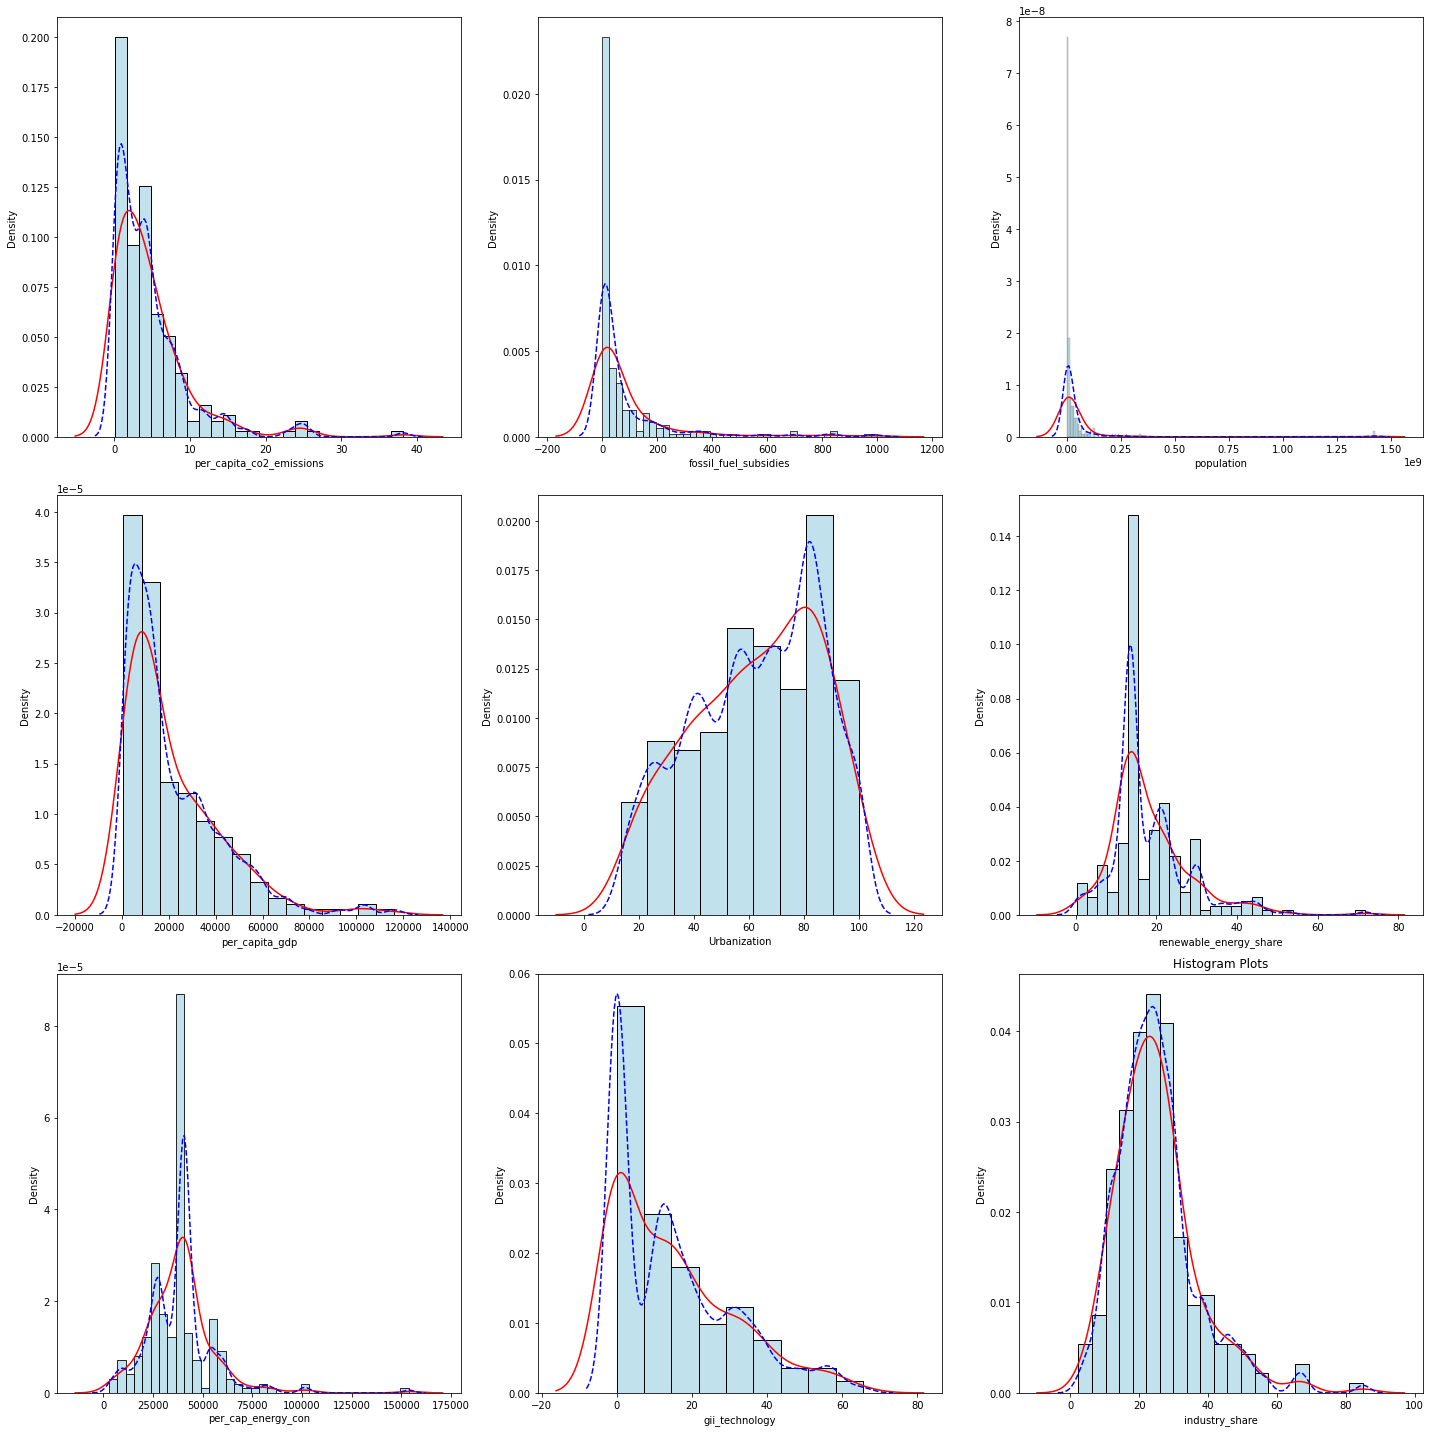

In [45]:
#histograms
fig, ax = plt.subplots(3,3, figsize = (20,20))

sns.histplot(raw_data_cleaned['per_capita_co2_emissions'], kde = False, stat = 'density', color = 'lightblue', ax = ax[0,0])
sns.kdeplot(raw_data_cleaned['per_capita_co2_emissions'], color = 'red', ax = ax[0,0])
sns.kdeplot(raw_data_cleaned['per_capita_co2_emissions'], bw_adjust = 0.5, color = 'blue', linestyle = '--', ax = ax[0,0])

sns.histplot(raw_data_cleaned['fossil_fuel_subsidies'], kde = False, stat = 'density', color = 'lightblue', ax = ax[0,1])
sns.kdeplot(raw_data_cleaned['fossil_fuel_subsidies'], color = 'red', ax = ax[0,1])
sns.kdeplot(raw_data_cleaned['fossil_fuel_subsidies'], bw_adjust = 0.5, color = 'blue', linestyle = '--', ax = ax[0,1])


sns.histplot(raw_data_cleaned['population'], kde = False, stat = 'density', color = 'lightblue', ax = ax[0,2])
sns.kdeplot(raw_data_cleaned['population'], color = 'red', ax = ax[0,2])
sns.kdeplot(raw_data_cleaned['population'], bw_adjust = 0.5, color = 'blue', linestyle = '--', ax = ax[0,2])

sns.histplot(raw_data_cleaned['per_capita_gdp'], kde = False, stat = 'density', color = 'lightblue', ax = ax[1,0])
sns.kdeplot(raw_data_cleaned['per_capita_gdp'], color = 'red', ax = ax[1,0])
sns.kdeplot(raw_data_cleaned['per_capita_gdp'], bw_adjust = 0.5, color = 'blue', linestyle = '--', ax = ax[1,0])

sns.histplot(raw_data_cleaned['Urbanization'], kde = False, stat = 'density', color = 'lightblue', ax = ax[1,1])
sns.kdeplot(raw_data_cleaned['Urbanization'], color = 'red', ax = ax[1,1])
sns.kdeplot(raw_data_cleaned['Urbanization'], bw_adjust = 0.5, color = 'blue', linestyle = '--', ax = ax[1,1])

sns.histplot(raw_data_cleaned['renewable_energy_share'], kde = False, stat = 'density', color = 'lightblue', ax = ax[1,2])
sns.kdeplot(raw_data_cleaned['renewable_energy_share'], color = 'red', ax = ax[1,2])
sns.kdeplot(raw_data_cleaned['renewable_energy_share'], bw_adjust = 0.5, color = 'blue', linestyle = '--', ax = ax[1,2])

sns.histplot(raw_data_cleaned['per_cap_energy_con'], kde = False, stat = 'density', color = 'lightblue', ax = ax[2,0])
sns.kdeplot(raw_data_cleaned['per_cap_energy_con'], color = 'red', ax = ax[2,0])
sns.kdeplot(raw_data_cleaned['per_cap_energy_con'], bw_adjust = 0.5, color = 'blue', linestyle = '--', ax = ax[2,0])

sns.histplot(raw_data_cleaned['gii_technology'], kde = False, stat = 'density', color = 'lightblue', ax = ax[2,1])
sns.kdeplot(raw_data_cleaned['gii_technology'], color = 'red', ax = ax[2,1])
sns.kdeplot(raw_data_cleaned['gii_technology'], bw_adjust = 0.5, color = 'blue', linestyle = '--', ax = ax[2,1])

sns.histplot(raw_data_cleaned['industry_share'], kde = False, stat = 'density', color = 'lightblue', ax = ax[2,2])
sns.kdeplot(raw_data_cleaned['industry_share'], color = 'red', ax = ax[2,2])
sns.kdeplot(raw_data_cleaned['industry_share'], bw_adjust = 0.5, color = 'blue', linestyle = '--', ax = ax[2,2])

plt.title('Histogram Plots')

plt.tight_layout()
plt.show()

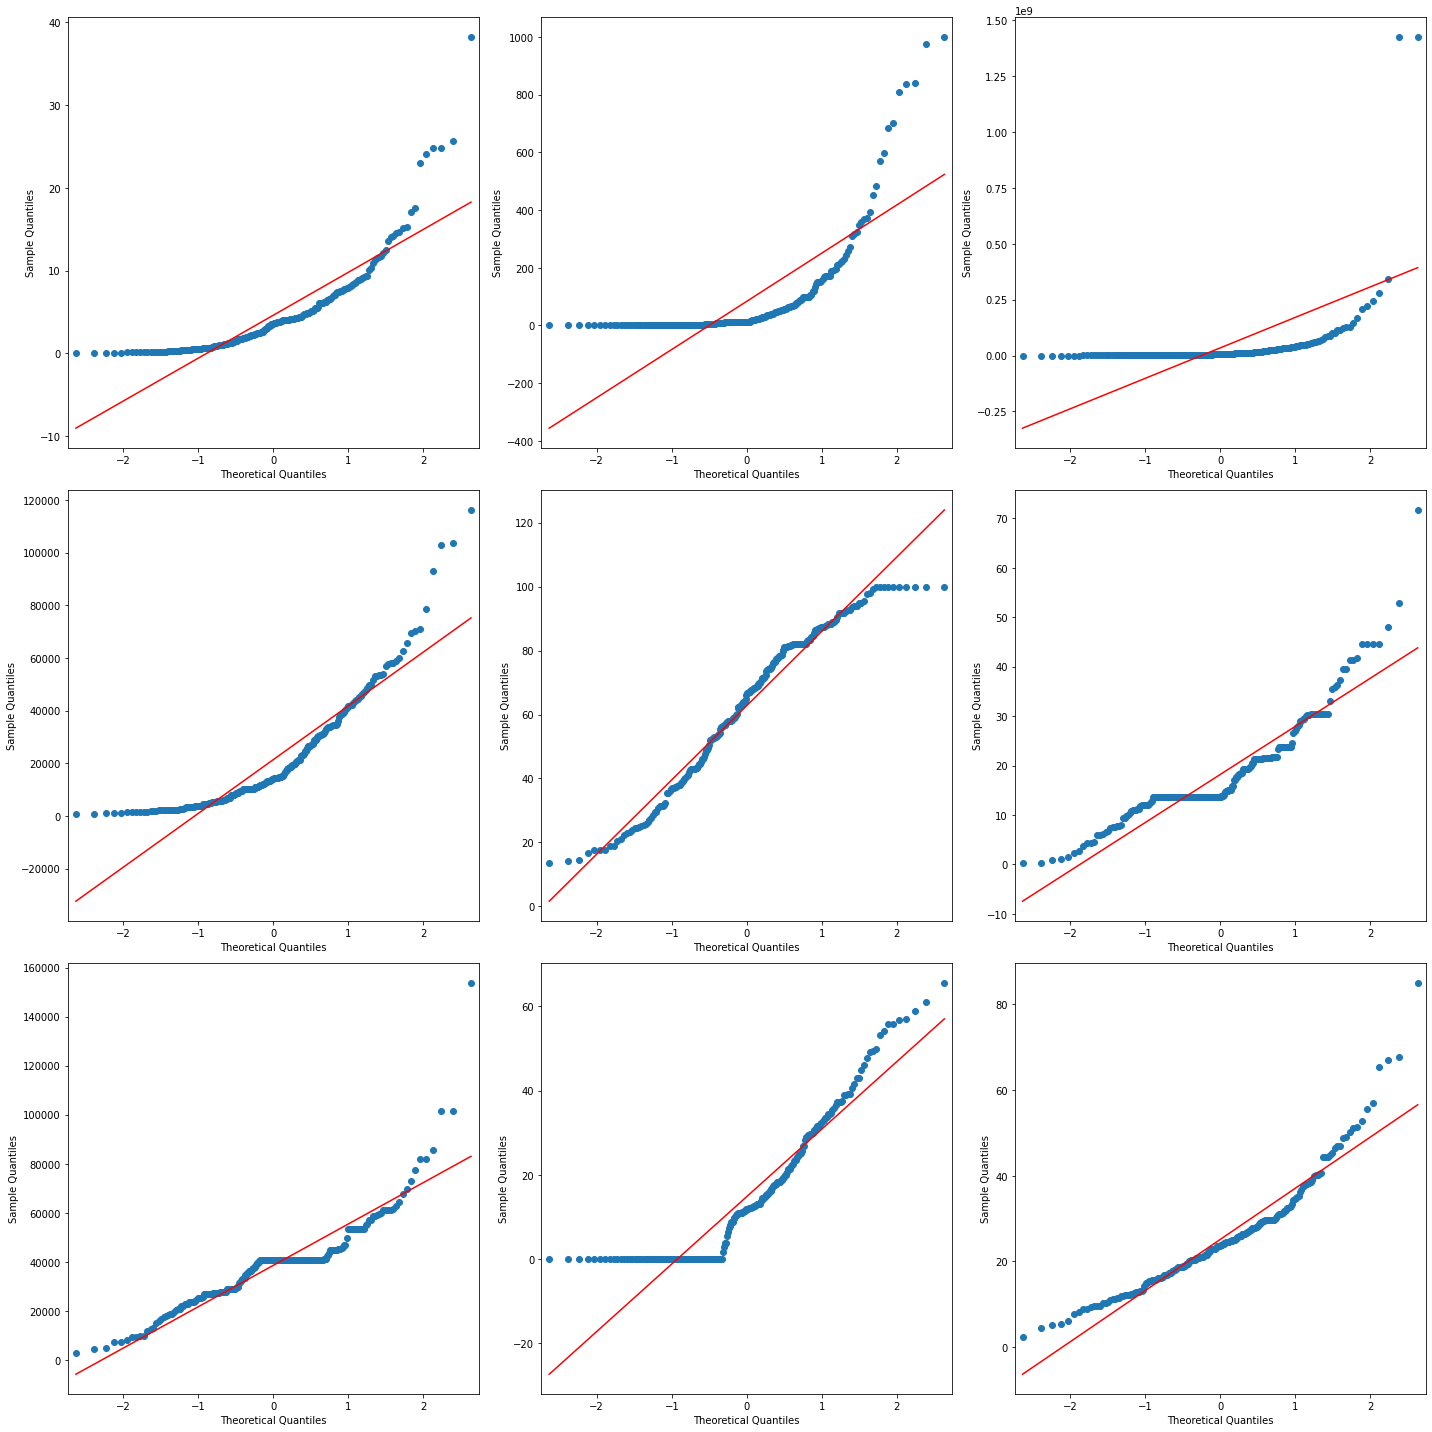

In [46]:
#Quantile Plots On Predictors

fig, ax = plt.subplots(3,3, figsize = (20,20))

sm.qqplot(raw_data_cleaned['per_capita_co2_emissions'], line = 's', ax = ax[0,0])
sm.qqplot(raw_data_cleaned['fossil_fuel_subsidies'], line = 's', ax = ax[0,1])
sm.qqplot(raw_data_cleaned['population'], line = 's', ax = ax[0,2])
sm.qqplot(raw_data_cleaned['per_capita_gdp'], line = 's', ax = ax[1,0])
sm.qqplot(raw_data_cleaned['Urbanization'], line = 's', ax = ax[1,1])
sm.qqplot(raw_data_cleaned['renewable_energy_share'], line = 's', ax = ax[1,2])
sm.qqplot(raw_data_cleaned['per_cap_energy_con'], line = 's', ax = ax[2,0])
sm.qqplot(raw_data_cleaned['gii_technology'], line = 's', ax = ax[2,1])
sm.qqplot(raw_data_cleaned['industry_share'], line = 's', ax = ax[2,2])
plt.tight_layout()
plt.show()

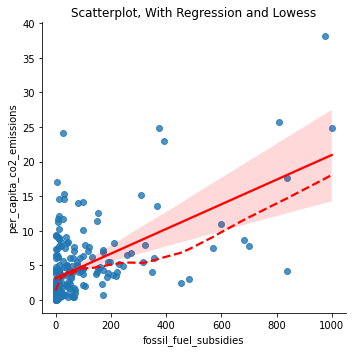

In [47]:
# Scatterplot with regression line and Lowess (locally weighted) smoother
sns.lmplot(raw_data_cleaned, x='fossil_fuel_subsidies', y='per_capita_co2_emissions', line_kws={'color':'red'})
sns.regplot(raw_data_cleaned, x='fossil_fuel_subsidies', y='per_capita_co2_emissions', color='red', lowess=True, scatter=False, line_kws={'linestyle':'--'})
plt.title('Scatterplot, With Regression and Lowess')
plt.tight_layout()

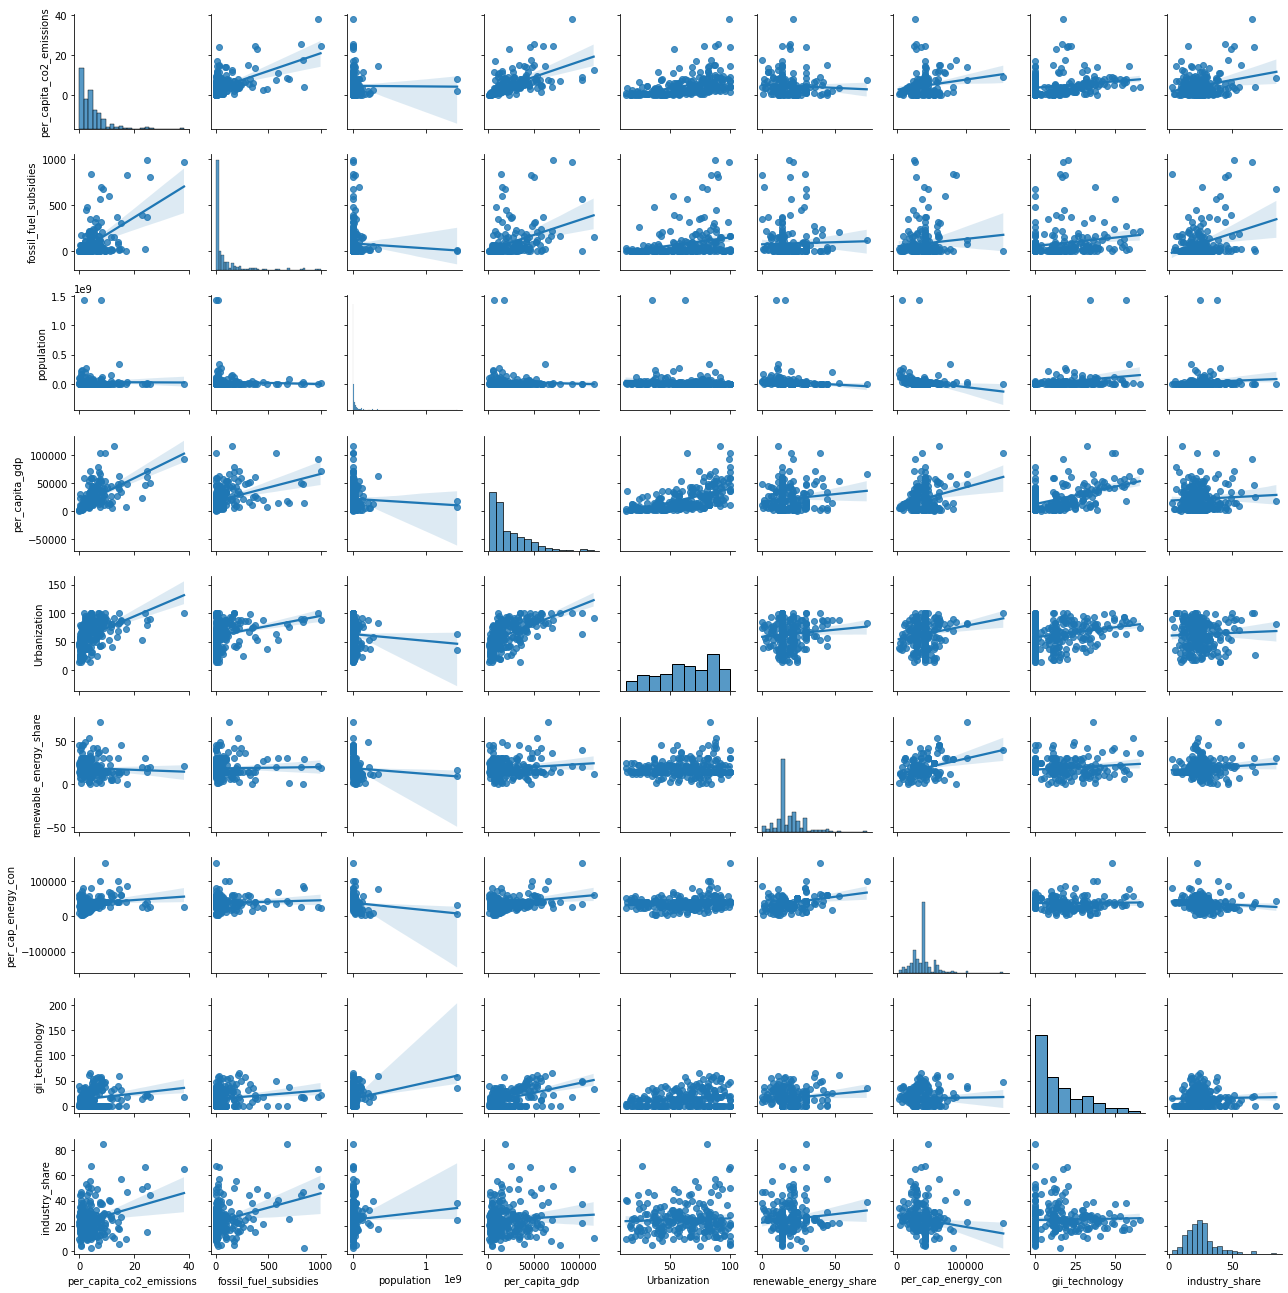

In [48]:
# Scatterplot matrix
sns.pairplot(raw_data_cleaned[['per_capita_co2_emissions', 'fossil_fuel_subsidies', 'population', 'per_capita_gdp', 'Urbanization', 'renewable_energy_share','per_cap_energy_con', 'gii_technology', 'industry_share']], kind='reg', height=2)
plt.tight_layout()

                          per_capita_co2_emissions  fossil_fuel_subsidies  \
per_capita_co2_emissions                  1.000000               0.574576   
fossil_fuel_subsidies                     0.574576               1.000000   
population                               -0.008211              -0.044207   
per_capita_gdp                            0.608999               0.397288   
Urbanization                              0.455464               0.252520   
renewable_energy_share                   -0.061228               0.027524   
per_cap_energy_con                        0.165868               0.083499   
gii_technology                            0.199125               0.176786   
industry_share                            0.270647               0.316870   

                          population  per_capita_gdp  Urbanization  \
per_capita_co2_emissions   -0.008211        0.608999      0.455464   
fossil_fuel_subsidies      -0.044207        0.397288      0.252520   
population         

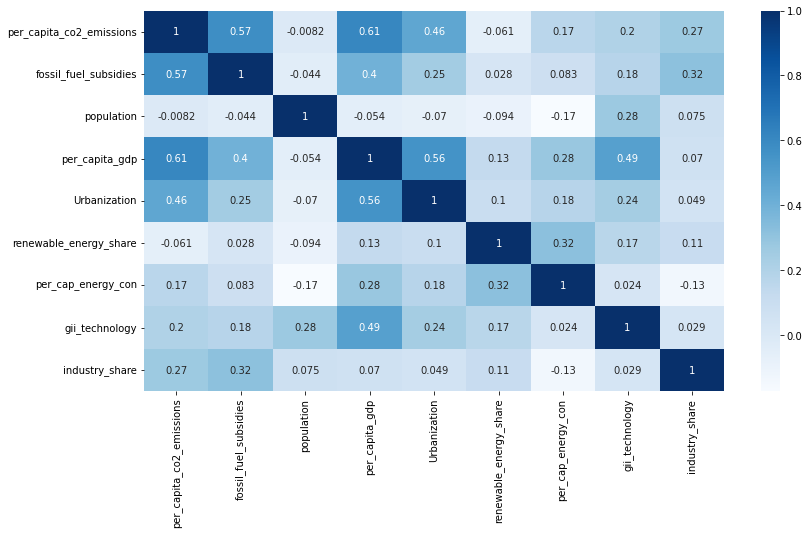

In [49]:
#Correlation Matrix
plt.figure(figsize=(13,7))
c= raw_data_cleaned[['per_capita_co2_emissions', 'fossil_fuel_subsidies', 'population', 'per_capita_gdp', 'Urbanization', 'renewable_energy_share','per_cap_energy_con', 'gii_technology', 'industry_share']].corr()
print(c)
sns.heatmap(c,annot=True, cmap="Blues")
plt.show()

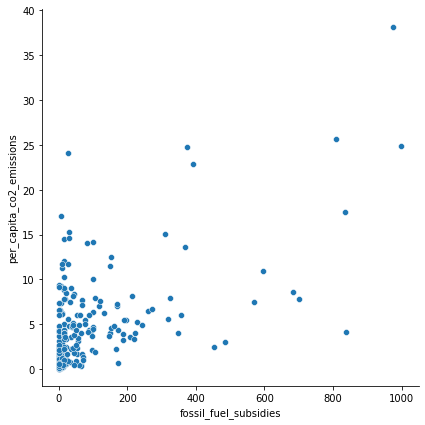

In [50]:
#Look at bivariate scatterplots in more detail
sns.relplot(x="fossil_fuel_subsidies", y="per_capita_co2_emissions",palette="muted",
            height=6, data=raw_data_cleaned)

plt.show()

### Part b)

In [14]:
#Panda Profiling

import pandas as pd
from ydata_profiling import ProfileReport

In [15]:
ProfileReport(raw_data_cleaned)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Question 2

### Part a)

In [51]:
raw_data_cleaned_2 = raw_data_cleaned.copy()


In [52]:

### Boruta using `BorutaPy`



# Prepare data
raw_data_cleaned_y = raw_data_cleaned_2['per_capita_co2_emissions'].values
raw_data_cleaned_x = raw_data_cleaned_2.drop(['per_capita_co2_emissions'] , axis=1).values.astype(np.float64)

#Boruta algorithm
rf = RandomForestRegressor(max_depth=5)
boruta = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=10, two_step=True) # `two_step` uses Bonferroni

# Run algorithm, X and y must by numpy arrays
boruta.fit(raw_data_cleaned_x, raw_data_cleaned_y)


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	3
Iteration: 	17 / 

BorutaPy(estimator=RandomForestRegressor(max_depth=5, n_estimators=63,
                                         random_state=RandomState(MT19937) at 0x1BA5CAFCAE8),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x1BA5CAFCAE8, verbose=2)

In [53]:
# Compile feature decisions
boruta_keep = ['Confirmed' if c else
               'Tentative' if t else
               'Reject' for c,t in zip(boruta.support_, boruta.support_weak_)]

# Combine results and print
boruta_features = zip(raw_data_cleaned_2.drop('per_capita_co2_emissions', axis=1).columns, boruta.ranking_, boruta_keep)
for feat in boruta_features:
    print('Feature: {:<20} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))

Feature: fossil_fuel_subsidies Rank: 1,  Keep: Confirmed
Feature: population           Rank: 2,  Keep: Tentative
Feature: per_capita_gdp       Rank: 1,  Keep: Confirmed
Feature: Urbanization         Rank: 4,  Keep: Reject
Feature: renewable_energy_share Rank: 3,  Keep: Reject
Feature: per_cap_energy_con   Rank: 1,  Keep: Confirmed
Feature: gii_technology       Rank: 5,  Keep: Reject
Feature: industry_share       Rank: 1,  Keep: Confirmed


  0%|          | 0/100 [00:00<?, ?it/s]

4 attributes confirmed important: ['per_cap_energy_con', 'industry_share', 'per_capita_gdp', 'fossil_fuel_subsidies']
3 attributes confirmed unimportant: ['renewable_energy_share', 'gii_technology', 'population']
1 tentative attributes remains: ['Urbanization']


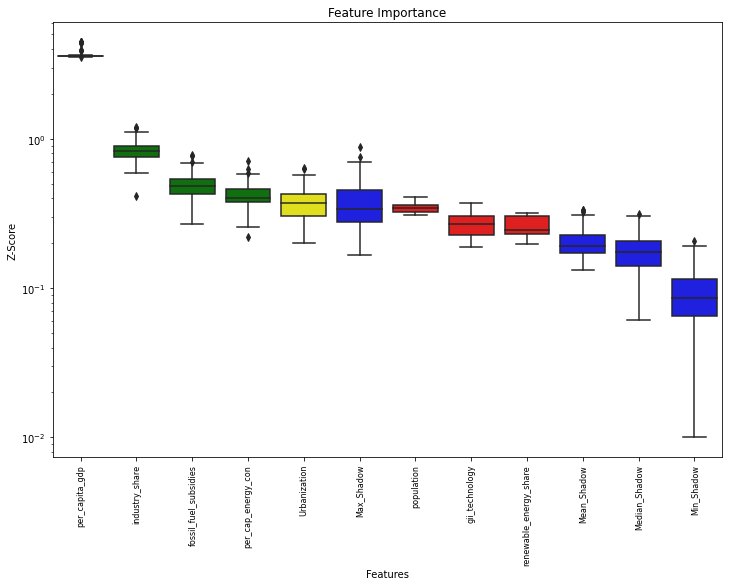

Feature: fossil_fuel_subsidies Rank: 3 (0.302),  Keep: Confirmed
Feature: population           Rank: 5 (2.211),  Keep: Reject
Feature: per_capita_gdp       Rank: 4 (0.275),  Keep: Confirmed
Feature: Urbanization         Rank: 1 (0.251),  Keep: Tentative
Feature: renewable_energy_share Rank: 7 (0.445),  Keep: Reject
Feature: per_cap_energy_con   Rank: 8 (0.074),  Keep: Confirmed
Feature: gii_technology       Rank: 10 (0.100),  Keep: Reject
Feature: industry_share       Rank: 2 (0.071),  Keep: Confirmed


In [54]:
### Boruta using `BorutaShap`
## Note: takes about 10 minutes

raw_data_cleaned2_X2 = raw_data_cleaned_2.drop('per_capita_co2_emissions', axis=1)

# Run Boruta algorithm
Feature_Selector = BorutaShap(importance_measure='shap', classification=False)
Feature_Selector.fit(X=raw_data_cleaned2_X2, y= raw_data_cleaned_y, n_trials=100, random_state=90095)

# Plot results
Feature_Selector.plot(which_features='all')
plt.show()

# Print results
boruta_keep2 = ['Confirmed' if p in Feature_Selector.accepted else
                'Tentative' if p in Feature_Selector.tentative else
                'Reject' for p in Feature_Selector.all_columns]

boruta_features2 = zip(Feature_Selector.all_columns,
                       len(Feature_Selector.shap_values) - np.argsort(Feature_Selector.shap_values),
                       Feature_Selector.shap_values,
                       boruta_keep2)
for feat in boruta_features2:
    print('Feature: {:<20} Rank: {} ({:.3f}),  Keep: {}'.format(feat[0], feat[1], feat[2], feat[3]))

### Part b)

Features: 218/218

Best subset: ['fossil_fuel_subsidies', 'per_capita_gdp', 'Urbanization', 'renewable_energy_share', 'industry_share']


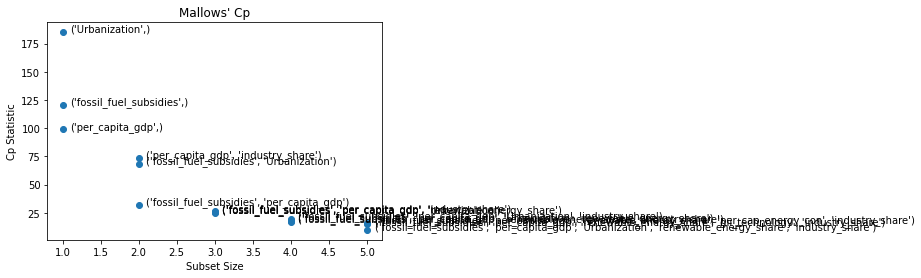

subsets  \
subsets                                                               
5       (fossil_fuel_subsidies, per_capita_gdp, Urbaniz...        5   
        (fossil_fuel_subsidies, per_capita_gdp, renewab...        5   
        (fossil_fuel_subsidies, per_capita_gdp, renewab...        5   
4       (fossil_fuel_subsidies, per_capita_gdp, renewab...        4   
        (fossil_fuel_subsidies, per_capita_gdp, Urbaniz...        4   
        (fossil_fuel_subsidies, per_capita_gdp, Urbaniz...        4   
3       (fossil_fuel_subsidies, per_capita_gdp, renewab...        3   
        (fossil_fuel_subsidies, per_capita_gdp, Urbaniz...        3   
        (fossil_fuel_subsidies, per_capita_gdp, industr...        3   
2       (fossil_fuel_subsidies, per_capita_gdp)                   2   
        (fossil_fuel_subsidies, Urbanization)                     2   
        (per_capita_gdp, industry_share)                          2   
1       (per_capita_gdp,)                                         1   
        (fossil_fuel_subsidies,)                                  1   
        (Urbanization,)                                           1   

                                                                    Cp  
subsets                                                                 
5       (fossil_fuel_subsidies, per_capita_gdp, Urbaniz...    9.804622  
        (fossil_fuel_subsidies, per_capita_gdp, renewab...   14.960474  
        (fossil_fuel_subsidies, per_capita_gdp, renewab...   15.955191  
4       (fossil_fuel_subsidies, per_capita_gdp, renewab...   17.032969  
        (fossil_fuel_subsidies, per_capita_gdp, Urbaniz...   17.735033  
        (fossil_fuel_subsidies, per_capita_gdp, Urbaniz...   19.918248  
3       (fossil_fuel_subsidies, per_capita_gdp, renewab...   24.843277  
        (fossil_fuel_subsidies, per_capita_gdp, Urbaniz...   25.569007  
        (fossil_fuel_subsidies, per_capita_gdp, industr...   26.287196  
2       (fossil_fuel_subsidies, per_capita_gdp)              31.915509  
        (fossil_fuel_subsidies, Urbanization)                68.343848  
        (per_capita_gdp, industry_share)                     73.518371  
1       (per_capita_gdp,)                                    99.047205  
        (fossil_fuel_subsidies,)                            120.486370  
        (Urbanization,)                                     185.046489

In [55]:
# Mallow's CP


#full regression
energy_reg = smf.ols('per_capita_co2_emissions ~ fossil_fuel_subsidies + population + per_capita_gdp + Urbanization + renewable_energy_share + per_cap_energy_con + gii_technology + industry_share', data = raw_data_cleaned).fit()
energ_reg_sig2 = energy_reg.mse_resid
energy_n, _ = raw_data_cleaned.shape
energy_reg.summary()


# Negative Mallows' cp, so we want largest
def negative_mallows(estimator, X, y):
    y_pred = estimator.predict(X)
    sse = np.sum((y - y_pred) ** 2)
    p = estimator.n_features_in_ + 1 # number features doesn't include bias term
    cp = sse / energ_reg_sig2 + 2*p - energy_n
    return -cp

# Set up regression
energy_reg_Y = raw_data_cleaned['per_capita_co2_emissions'].values
energy_reg_X = raw_data_cleaned.drop('per_capita_co2_emissions', axis=1)
lr = LinearRegression(fit_intercept=True)

# Using `ExhaustiveFeatureSelector` from `mlxtend`
energy_efs = EFS(lr,
              min_features=1,
              max_features=5,
              scoring=negative_mallows,
              cv=None)

# Run regressions
energy_efs.fit(raw_data_cleaned2_X2, raw_data_cleaned_y)
print('Best subset:', [energy_efs.feature_names[i] for i in energy_efs.best_idx_])

# Extract Mallows' Cp data
energy_efs_features = [energy_efs.subsets_[p]['feature_names'] for p in energy_efs.subsets_]
energy_efs_subset = [len(energy_efs.subsets_[p]['feature_idx']) for p in energy_efs.subsets_]
energy_efs_cp = [ -energy_efs.subsets_[p]['avg_score'] for p in energy_efs.subsets_]
energy_mallows = pd.DataFrame({'subsets':energy_efs_subset, 'Cp':energy_efs_cp}, index=energy_efs_features)

# Top 3 best, by subset
energy_mallows_best = energy_mallows.groupby('subsets')[['subsets','Cp']].apply(lambda x: x.nsmallest(3, 'Cp'))
energy_mallows_best

# Plotting best subsets
plt.scatter(energy_mallows_best['subsets'], energy_mallows_best['Cp'])
plt.title("Mallows' Cp")
plt.xlabel('Subset Size')
plt.ylabel('Cp Statistic')
for i,sub in enumerate(energy_mallows_best['subsets']):
    subset = energy_mallows_best.index[i][1]
    plt.annotate(subset, (sub + 0.1, energy_mallows_best.iloc[i]['Cp'] + 0.3)) # to plot labels
plt.tight_layout()
plt.show()

# And the associated sorted data frame
energy_mallows_best.sort_values('Cp')


In [56]:
energy_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     per_capita_co2_emissions   R-squared:                       0.569
Model:                                  OLS   Adj. R-squared:                  0.553
Method:                       Least Squares   F-statistic:                     37.40
Date:                      Thu, 24 Oct 2024   Prob (F-statistic):           1.74e-37
Time:                              15:59:30   Log-Likelihood:                -623.85
No. Observations:                       236   AIC:                             1266.
Df Residuals:                           227   BIC:                             1297.
Df Model:                                 8                                         
Covariance Type:                  nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1.3418      1.011     -1.328      0.186      -3.333       0.650
fossil_fuel_subsidies      0.0104      0.002      6.633      0.000       0.007       0.013
population              2.106e-09    1.8e-09      1.169      0.244   -1.44e-09    5.66e-09
per_capita_gdp             0.0001   1.62e-05      6.761      0.000    7.77e-05       0.000
Urbanization               0.0348      0.012      2.970      0.003       0.012       0.058
renewable_energy_share    -0.0851      0.025     -3.341      0.001      -0.135      -0.035
per_cap_energy_con      2.227e-05   1.52e-05      1.462      0.145   -7.75e-06    5.23e-05
gii_technology            -0.0334      0.018     -1.889      0.060      -0.068       0.001
industry_share             0.0665      0.021      3.215      0.001       0.026       0.107
==============================================================================
Omnibus:                       90.340   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              363.224
Skew:                           1.533   Prob(JB):                     1.34e-79
Kurtosis:                       8.248   Cond. No.                     6.29e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Question 3

### Untransformed Version

                               OLS Regression Results                               
Dep. Variable:     per_capita_co2_emissions   R-squared:                       0.371
Model:                                  OLS   Adj. R-squared:                  0.368
Method:                       Least Squares   F-statistic:                     137.9
Date:                      Thu, 24 Oct 2024   Prob (F-statistic):           2.40e-25
Time:                              15:59:30   Log-Likelihood:                -668.37
No. Observations:                       236   AIC:                             1341.
Df Residuals:                           234   BIC:                             1348.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

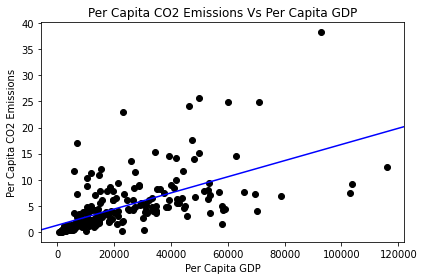

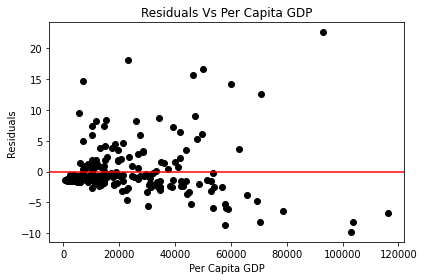

In [57]:
#per capita gdp
model_1_untrans = smf.ols('per_capita_co2_emissions ~ per_capita_gdp', data = raw_data_cleaned).fit()
print(model_1_untrans.summary())
model_1_untrans.residuals = model_1_untrans.resid
model_1_untrans.residuals

#Parameter

model_1_untrans_b1, model_1_untrans_b2 = model_1_untrans.params # extract estimates

#plotting regression line

plt.scatter(x = raw_data_cleaned['per_capita_gdp'], y = raw_data_cleaned['per_capita_co2_emissions'], color = 'black')
plt.axline(xy1 = (0, model_1_untrans_b1), slope= model_1_untrans_b2, color='blue')
plt.ylabel('Per Capita CO2 Emissions')
plt.xlabel('Per Capita GDP')
plt.title('Per Capita CO2 Emissions Vs Per Capita GDP')
plt.tight_layout()
plt.show()

#Plotting Residuals

plt.scatter(x = raw_data_cleaned['per_capita_gdp'], y = model_1_untrans.resid, color = 'black')
plt.axhline(y = 0, color='red')
plt.ylabel('Residuals')
plt.xlabel('Per Capita GDP')
plt.title('Residuals Vs Per Capita GDP')
plt.tight_layout()
plt.show()


In [58]:
print(np.sum(model_1_untrans.resid))
np.cov(model_1_untrans.resid, raw_data_cleaned.per_capita_gdp)

3.694822225952521e-13


array([[ 1.69542479e+01, -1.10223017e-11],
       [-1.10223017e-11,  4.18806965e+08]])

                               OLS Regression Results                               
Dep. Variable:     per_capita_co2_emissions   R-squared:                       0.330
Model:                                  OLS   Adj. R-squared:                  0.327
Method:                       Least Squares   F-statistic:                     115.3
Date:                      Thu, 24 Oct 2024   Prob (F-statistic):           3.93e-22
Time:                              15:59:30   Log-Likelihood:                -675.77
No. Observations:                       236   AIC:                             1356.
Df Residuals:                           234   BIC:                             1362.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

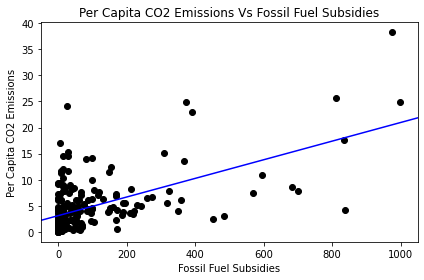

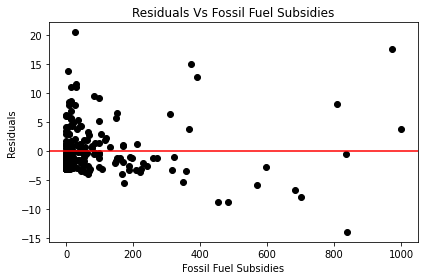

In [59]:
# Fossil Fuel Subsidies

model_2_untrans = smf.ols('per_capita_co2_emissions ~ fossil_fuel_subsidies', data = raw_data_cleaned).fit()
print(model_2_untrans.summary())
model_2_untrans.residuals = model_2_untrans.resid
model_2_untrans.residuals

#Parameter

model_2_untrans_b1, model_2_untrans_b2 = model_2_untrans.params # extract estimates

#plotting regression line

plt.scatter(x = raw_data_cleaned['fossil_fuel_subsidies'], y = raw_data_cleaned['per_capita_co2_emissions'], color = 'black')
plt.axline(xy1 = (0, model_2_untrans_b1), slope= model_2_untrans_b2, color='blue')
plt.ylabel('Per Capita CO2 Emissions')
plt.xlabel('Fossil Fuel Subsidies')
plt.title('Per Capita CO2 Emissions Vs Fossil Fuel Subsidies')
plt.tight_layout()
plt.show()

#Plotting Residuals

plt.scatter(x = raw_data_cleaned['fossil_fuel_subsidies'], y = model_2_untrans.resid, color = 'black')
plt.axhline(y = 0, color='red')
plt.ylabel('Residuals')
plt.xlabel('Fossil Fuel Subsidies')
plt.title('Residuals Vs Fossil Fuel Subsidies')
plt.tight_layout()
plt.show()

In [60]:
print(np.sum(model_2_untrans.resid))
np.cov(model_2_untrans.resid, raw_data_cleaned.fossil_fuel_subsidies)

2.948752353404416e-13


array([[ 1.80522330e+01, -1.08365326e-13],
       [-1.08365326e-13,  2.79790515e+04]])

                               OLS Regression Results                               
Dep. Variable:     per_capita_co2_emissions   R-squared:                       0.207
Model:                                  OLS   Adj. R-squared:                  0.204
Method:                       Least Squares   F-statistic:                     61.25
Date:                      Thu, 24 Oct 2024   Prob (F-statistic):           1.73e-13
Time:                              15:59:31   Log-Likelihood:                -695.62
No. Observations:                       236   AIC:                             1395.
Df Residuals:                           234   BIC:                             1402.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

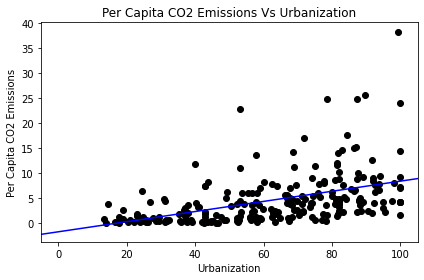

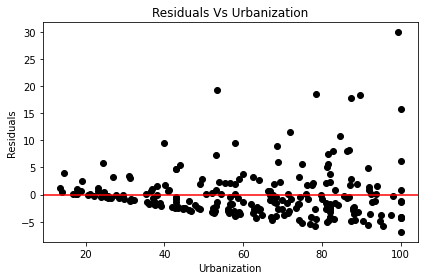

In [61]:
# Urbanization

model_3_untrans = smf.ols('per_capita_co2_emissions ~ Urbanization', data = raw_data_cleaned).fit()
print(model_3_untrans.summary())
model_3_untrans.residuals = model_3_untrans.resid
model_3_untrans.residuals

#Parameter

model_3_untrans_b1, model_3_untrans_b2 = model_3_untrans.params # extract estimates

#plotting regression line

plt.scatter(x = raw_data_cleaned['Urbanization'], y = raw_data_cleaned['per_capita_co2_emissions'], color = 'black')
plt.axline(xy1 = (0, model_3_untrans_b1), slope= model_3_untrans_b2, color='blue')
plt.ylabel('Per Capita CO2 Emissions')
plt.xlabel('Urbanization')
plt.title('Per Capita CO2 Emissions Vs Urbanization')
plt.tight_layout()
plt.show()

#Plotting Residuals

plt.scatter(x = raw_data_cleaned['Urbanization'], y = model_3_untrans.resid, color = 'black')
plt.axhline(y = 0, color='red')
plt.ylabel('Residuals')
plt.xlabel('Urbanization')
plt.title('Residuals Vs Urbanization')
plt.tight_layout()
plt.show()

In [62]:
print(np.sum(model_3_untrans.resid))
np.cov(model_3_untrans.resid, raw_data_cleaned.Urbanization)

-3.623767952376511e-13


array([[ 2.13586142e+01, -8.22415422e-15],
       [-8.22415422e-15,  5.41804233e+02]])

## Transformed Version

In [63]:
# Power Transformation
def power_transform(variable, power):
    # For power = 0 (log transformation), handle it explicitly
    if power == 0:
        return np.log(variable)
    else:
        return np.power(variable, power)

# Transformation for Per Capita CO2 Emissions (power = -0.1)
raw_data_cleaned['per_capita_co2_emissions_transformed'] = power_transform(raw_data_cleaned['per_capita_co2_emissions'], -0.1)

# Apply transformation for Fossil Fuel Subsidies (power = 0)
raw_data_cleaned['fossil_fuel_subsidies_transformed'] = power_transform(raw_data_cleaned['fossil_fuel_subsidies'], 0)

# Apply transformation for Per Capita GDP (power = 0.2)
raw_data_cleaned['per_capita_gdp_transformed'] = power_transform(raw_data_cleaned['per_capita_gdp'], 0.2)

# Apply transformation for Urbanization (power = 1.2)
raw_data_cleaned['Urbanization_transformed'] = power_transform(raw_data_cleaned['Urbanization'], 1.2)




                                     OLS Regression Results                                     
Dep. Variable:     per_capita_co2_emissions_transformed   R-squared:                       0.635
Model:                                              OLS   Adj. R-squared:                  0.634
Method:                                   Least Squares   F-statistic:                     407.3
Date:                                  Thu, 24 Oct 2024   Prob (F-statistic):           3.87e-53
Time:                                          15:59:31   Log-Likelihood:                 259.52
No. Observations:                                   236   AIC:                            -515.0
Df Residuals:                                       234   BIC:                            -508.1
Df Model:                                             1                                         
Covariance Type:                              nonrobust                                         
                              

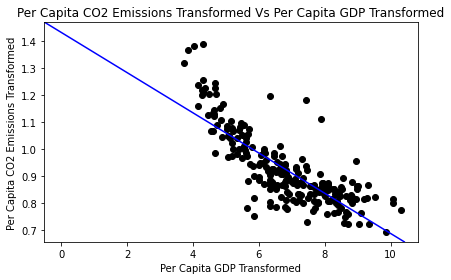

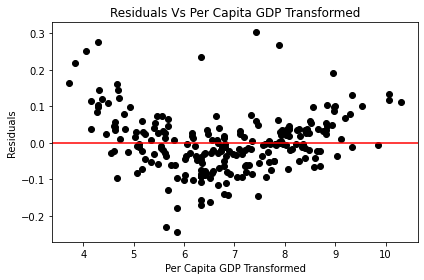

In [64]:
# Transformed Per Capita
model_transformed_1 = smf.ols('per_capita_co2_emissions_transformed ~ per_capita_gdp_transformed', data = raw_data_cleaned).fit()
print(model_transformed_1.summary())
model_transformed_1.residuals = model_transformed_1.resid
model_transformed_1.residuals

#Parameter

model_transformed_1_b1, model_transformed_1_b2 = model_transformed_1.params # extract estimates

# Plotting regression line

plt.scatter(x = raw_data_cleaned['per_capita_gdp_transformed'], y = raw_data_cleaned['per_capita_co2_emissions_transformed'], color = 'black')
plt.axline(xy1 = (0, model_transformed_1_b1), slope= model_transformed_1_b2, color='blue')
plt.ylabel('Per Capita CO2 Emissions Transformed')
plt.xlabel('Per Capita GDP Transformed')
plt.title('Per Capita CO2 Emissions Transformed Vs Per Capita GDP Transformed')
plt.tight_layout()
plt.show()

# Residuals Plot
plt.scatter(x= raw_data_cleaned.per_capita_gdp_transformed, y= model_transformed_1.resid, color='black')
plt.axhline(y=0, color='red')
plt.ylabel('Residuals')
plt.xlabel('Per Capita GDP Transformed')
plt.title('Residuals Vs Per Capita GDP Transformed')
plt.tight_layout()
plt.show()

                                     OLS Regression Results                                     
Dep. Variable:     per_capita_co2_emissions_transformed   R-squared:                         nan
Model:                                              OLS   Adj. R-squared:                    nan
Method:                                   Least Squares   F-statistic:                       nan
Date:                                  Thu, 24 Oct 2024   Prob (F-statistic):                nan
Time:                                          15:59:31   Log-Likelihood:                    nan
No. Observations:                                   236   AIC:                               nan
Df Residuals:                                       236   BIC:                               nan
Df Model:                                            -1                                         
Covariance Type:                              nonrobust                                         
                              

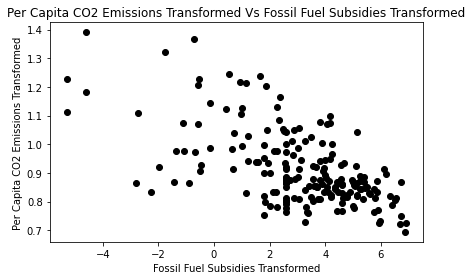

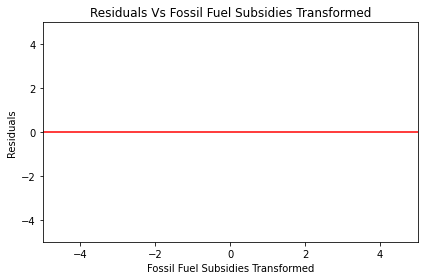

In [65]:
# Transformed Fossil Fuel Subsidies
model_transformed_2 = smf.ols('per_capita_co2_emissions_transformed ~ fossil_fuel_subsidies_transformed', data = raw_data_cleaned).fit()
print(model_transformed_2.summary())
model_transformed_2.residuals = model_transformed_2.resid
model_transformed_2.residuals

#Parameter

model_transformed_2_b1, model_transformed_2_b2 = model_transformed_2.params # extract estimates

# Plotting regression line

plt.scatter(x = raw_data_cleaned['fossil_fuel_subsidies_transformed'], y = raw_data_cleaned['per_capita_co2_emissions_transformed'], color = 'black')
plt.axline(xy1 = (0, model_transformed_2_b1), slope= model_transformed_2_b2, color='blue')
plt.ylabel('Per Capita CO2 Emissions Transformed')
plt.xlabel('Fossil Fuel Subsidies Transformed')
plt.title('Per Capita CO2 Emissions Transformed Vs Fossil Fuel Subsidies Transformed')
plt.tight_layout()
plt.show()

# Residuals Plot
plt.scatter(x= raw_data_cleaned['fossil_fuel_subsidies_transformed'], y= model_transformed_2.resid, color='black')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.axhline(y=0, color='red')
plt.ylabel('Residuals')
plt.xlabel('Fossil Fuel Subsidies Transformed')
plt.title('Residuals Vs Fossil Fuel Subsidies Transformed')
plt.tight_layout()
plt.show()

                                     OLS Regression Results                                     
Dep. Variable:     per_capita_co2_emissions_transformed   R-squared:                       0.360
Model:                                              OLS   Adj. R-squared:                  0.357
Method:                                   Least Squares   F-statistic:                     131.4
Date:                                  Thu, 24 Oct 2024   Prob (F-statistic):           1.96e-24
Time:                                          15:59:32   Log-Likelihood:                 193.15
No. Observations:                                   236   AIC:                            -382.3
Df Residuals:                                       234   BIC:                            -375.4
Df Model:                                             1                                         
Covariance Type:                              nonrobust                                         
                   coef    std

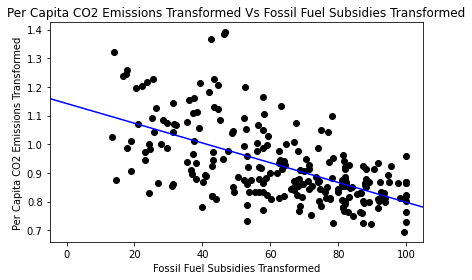

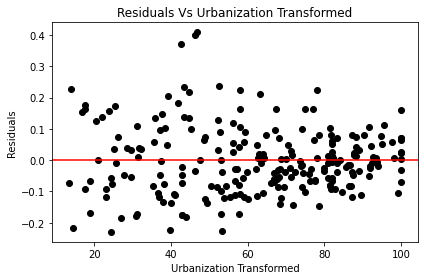

In [66]:
# Transformed Urbanization
model_transformed_3 = smf.ols('per_capita_co2_emissions_transformed ~ Urbanization', data = raw_data_cleaned).fit()
print(model_transformed_3.summary())
model_transformed_3.residuals = model_transformed_3.resid
model_transformed_3.residuals

#Parameter

model_transformed_3_b1, model_transformed_3_b2 = model_transformed_3.params # extract estimates

# Plotting regression line

plt.scatter(x = raw_data_cleaned['Urbanization'], y = raw_data_cleaned['per_capita_co2_emissions_transformed'], color = 'black')
plt.axline(xy1 = (0, model_transformed_3_b1), slope= model_transformed_3_b2, color='blue')
plt.ylabel('Per Capita CO2 Emissions Transformed')
plt.xlabel('Fossil Fuel Subsidies Transformed')
plt.title('Per Capita CO2 Emissions Transformed Vs Fossil Fuel Subsidies Transformed')
plt.tight_layout()
plt.show()

# Residuals Plot
plt.scatter(x = raw_data_cleaned['Urbanization'], y= model_transformed_3.resid, color='black')
plt.axhline(y = 0, color='red')
plt.ylabel('Residuals')
plt.xlabel('Urbanization Transformed')
plt.title('Residuals Vs Urbanization Transformed')
plt.tight_layout()
plt.show()

### Bootstrapping Regression Models

### Untransformed Models

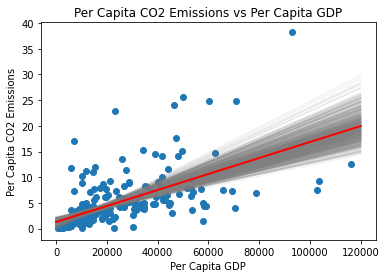

In [67]:
# Model 1 Untransformed (Per capita GDP)

random.seed(90095)
n_boot = 500 # number of bootstraps

# initializations
boot_rmse = []
boot_b1 = []
boot_b2 = []
boot_sig2hat = [] # sigma^2 hat estimates (or std error ^2)
boot_r2 = [] # R^2 (no need to adjust)

per_capita_gdp_span_x = pd.DataFrame({'per_capita_gdp':np.linspace(0, 120000, 200)}) # x spanning 3.5 through 34 for graphing

for iter in range(n_boot):
   # Sampling with replacement
   raw_data_cleaned_sample = raw_data_cleaned.sample(n=raw_data_cleaned.shape[0], replace=True) # `sample` method for pandas DataFrame
   raw_data_cleaned_sample_ols = smf.ols('per_capita_co2_emissions ~ per_capita_gdp', data=raw_data_cleaned_sample).fit() # fit model

   # Append coefficients
   boot_b1.append(raw_data_cleaned_sample_ols.params[0])          # intercept
   boot_b2.append(raw_data_cleaned_sample_ols.params[1])          # slope
   # Performance measures
   boot_sig2hat.append(raw_data_cleaned_sample_ols.scale)         # scale = estimated sigma^2
   boot_rmse.append(np.sqrt(np.mean(raw_data_cleaned_sample_ols.resid ** 2))) # RMSE
   boot_r2.append(raw_data_cleaned_sample_ols.rsquared)           # R^2

   # Plot a greyed out line for this iteration
   raw_data_cleaned_sample_yhat = raw_data_cleaned_sample_ols.predict(per_capita_gdp_span_x)
   plt.plot(per_capita_gdp_span_x, raw_data_cleaned_sample_yhat, color='grey', alpha=0.1)

# Fit averaged model
raw_data_cleaned_ols_span_y = np.mean(boot_b1) + per_capita_gdp_span_x * np.mean(boot_b2)

# Plotting the fitted lines
plt.scatter( raw_data_cleaned['per_capita_gdp'], raw_data_cleaned['per_capita_co2_emissions'])
plt.plot(per_capita_gdp_span_x, raw_data_cleaned_ols_span_y, color='r', linewidth=2)
plt.xlabel('Per Capita GDP')
plt.ylabel('Per Capita CO2 Emissions')
plt.title('Per Capita CO2 Emissions vs Per Capita GDP')
plt.show()

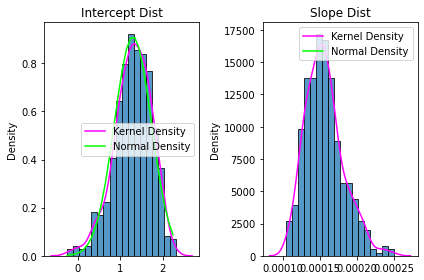

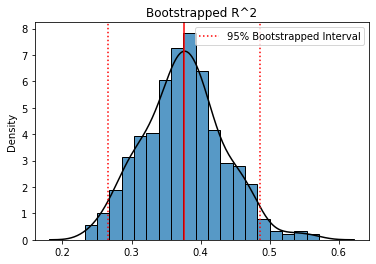

--- sigma hat ---
estimate:		4.0857
std error:		0.42277
median:			4.1116
2.5 percentile:		3.31
97.5 percentile:	4.9073


In [68]:
# Next the distributions of the estimates

# For plotting normal PDFs
b1_range = np.arange(np.min(boot_b1), np.max(boot_b1), 0.1)
b2_range = np.arange(np.min(boot_b2), np.max(boot_b2), 0.1)

# Plotting beta estimates
fig6, ax6 = plt.subplots(1, 2)
sns.histplot(boot_b1, stat='density', kde=False, ax=ax6[0])
sns.kdeplot(boot_b1, color='fuchsia', ax=ax6[0], label='Kernel Density')
sns.lineplot(x=b1_range, y=norm.pdf(b1_range, np.mean(boot_b1), np.std(boot_b1)), color='lime',ax=ax6[0], label='Normal Density')
ax6[0].set_title('Intercept Dist')
sns.histplot(boot_b2, stat='density', kde=False, ax=ax6[1])
sns.kdeplot(boot_b2, color='fuchsia', ax=ax6[1], label='Kernel Density')
sns.lineplot(x=b2_range, y=norm.pdf(b2_range, np.mean(boot_b2), np.std(boot_b2)), color='lime',ax=ax6[1], label='Normal Density')
ax6[1].set_title('Slope Dist')
plt.tight_layout()
plt.show()

# Bootstrap for distribution of R^2 (coefficient of determination)
sns.histplot(boot_r2, stat='density', kde=False)
sns.kdeplot(boot_r2, color='black')
plt.axvline(x=np.quantile(boot_r2, q=0.025), color='red', linestyle=':', label='95% Bootstrapped Interval')
plt.axvline(x=np.quantile(boot_r2, q=0.5), color='red')
plt.axvline(x=np.quantile(boot_r2, q=0.975), color='red', linestyle=':')
plt.title('Bootstrapped R^2')
plt.legend()
plt.show()

# Bootstrap for estimated residual standard deviation
boot_stdhat = np.sqrt(boot_sig2hat)
print('--- sigma hat ---\n' +
      f'estimate:\t\t{boot_stdhat.mean():.5}\n' +
      f'std error:\t\t{boot_stdhat.std():.5}\n' +
      f'median:\t\t\t{np.quantile(boot_stdhat, q=0.5):.5}\n' +
      f'2.5 percentile:\t\t{np.quantile(boot_stdhat, q=0.025):.5}\n' +
      f'97.5 percentile:\t{np.quantile(boot_stdhat, q=0.975):.5}'
      )

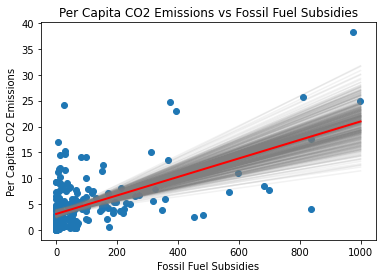

In [69]:
# Model 2 Untransformed (Fossil Fuel Subsidies)

random.seed(90095)
n_boot = 500 # number of bootstraps

# initializations
boot_rmse = []
boot_b1 = []
boot_b2 = []
boot_sig2hat = [] # sigma^2 hat estimates (or std error ^2)
boot_r2 = [] # R^2 (no need to adjust)

fossil_fuel_subsidies_span_x = pd.DataFrame({'fossil_fuel_subsidies':np.linspace(0, 1000, 200)}) # x spanning 3.5 through 34 for graphing

for iter in range(n_boot):
   # Sampling with replacement
   raw_data_cleaned_sample = raw_data_cleaned.sample(n=raw_data_cleaned.shape[0], replace=True) # `sample` method for pandas DataFrame
   raw_data_cleaned_sample_ols = smf.ols('per_capita_co2_emissions ~ fossil_fuel_subsidies', data=raw_data_cleaned_sample).fit() # fit model

   # Append coefficients
   boot_b1.append(raw_data_cleaned_sample_ols.params[0])          # intercept
   boot_b2.append(raw_data_cleaned_sample_ols.params[1])          # slope
   # Performance measures
   boot_sig2hat.append(raw_data_cleaned_sample_ols.scale)         # scale = estimated sigma^2
   boot_rmse.append(np.sqrt(np.mean(raw_data_cleaned_sample_ols.resid ** 2))) # RMSE
   boot_r2.append(raw_data_cleaned_sample_ols.rsquared)           # R^2

   # Plot a greyed out line for this iteration
   raw_data_cleaned_sample_yhat = raw_data_cleaned_sample_ols.predict(fossil_fuel_subsidies_span_x)
   plt.plot(fossil_fuel_subsidies_span_x, raw_data_cleaned_sample_yhat, color='grey', alpha=0.1)

# Fit averaged model
raw_data_cleaned_ols_span_y = np.mean(boot_b1) + fossil_fuel_subsidies_span_x * np.mean(boot_b2)

# Plotting the fitted lines
plt.scatter( raw_data_cleaned['fossil_fuel_subsidies'], raw_data_cleaned['per_capita_co2_emissions'])
plt.plot(fossil_fuel_subsidies_span_x, raw_data_cleaned_ols_span_y, color='r', linewidth=2)
plt.xlabel('Fossil Fuel Subsidies')
plt.ylabel('Per Capita CO2 Emissions')
plt.title('Per Capita CO2 Emissions vs Fossil Fuel Subsidies')
plt.show()

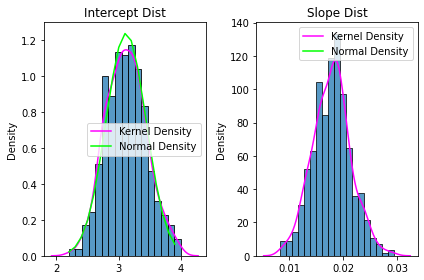

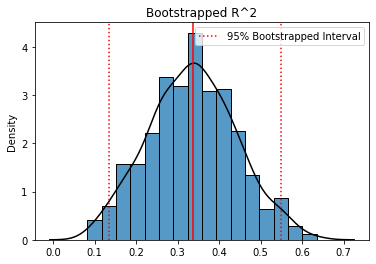

--- sigma hat ---
estimate:		4.1882
std error:		0.36054
median:			4.1876
2.5 percentile:		3.4686
97.5 percentile:	4.8915


In [70]:
# Next the distributions of the estimates

# For plotting normal PDFs
b1_range = np.arange(np.min(boot_b1), np.max(boot_b1), 0.1)
b2_range = np.arange(np.min(boot_b2), np.max(boot_b2), 0.1)

# Plotting beta estimates
fig6, ax6 = plt.subplots(1, 2)
sns.histplot(boot_b1, stat='density', kde=False, ax=ax6[0])
sns.kdeplot(boot_b1, color='fuchsia', ax=ax6[0], label='Kernel Density')
sns.lineplot(x=b1_range, y=norm.pdf(b1_range, np.mean(boot_b1), np.std(boot_b1)), color='lime',ax=ax6[0], label='Normal Density')
ax6[0].set_title('Intercept Dist')
sns.histplot(boot_b2, stat='density', kde=False, ax=ax6[1])
sns.kdeplot(boot_b2, color='fuchsia', ax=ax6[1], label='Kernel Density')
sns.lineplot(x=b2_range, y=norm.pdf(b2_range, np.mean(boot_b2), np.std(boot_b2)), color='lime',ax=ax6[1], label='Normal Density')
ax6[1].set_title('Slope Dist')
plt.tight_layout()
plt.show()

# Bootstrap for distribution of R^2 (coefficient of determination)
sns.histplot(boot_r2, stat='density', kde=False)
sns.kdeplot(boot_r2, color='black')
plt.axvline(x=np.quantile(boot_r2, q=0.025), color='red', linestyle=':', label='95% Bootstrapped Interval')
plt.axvline(x=np.quantile(boot_r2, q=0.5), color='red')
plt.axvline(x=np.quantile(boot_r2, q=0.975), color='red', linestyle=':')
plt.title('Bootstrapped R^2')
plt.legend()
plt.show()

# Bootstrap for estimated residual standard deviation
boot_stdhat = np.sqrt(boot_sig2hat)
print('--- sigma hat ---\n' +
      f'estimate:\t\t{boot_stdhat.mean():.5}\n' +
      f'std error:\t\t{boot_stdhat.std():.5}\n' +
      f'median:\t\t\t{np.quantile(boot_stdhat, q=0.5):.5}\n' +
      f'2.5 percentile:\t\t{np.quantile(boot_stdhat, q=0.025):.5}\n' +
      f'97.5 percentile:\t{np.quantile(boot_stdhat, q=0.975):.5}'
      )

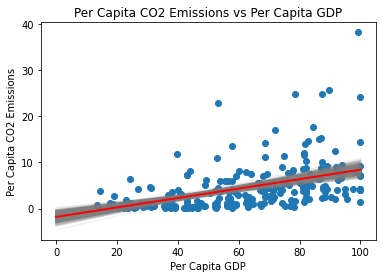

In [71]:
# Model 3 Untransformed (Urbanization)

random.seed(90095)
n_boot = 500 # number of bootstraps

# initializations
boot_rmse = []
boot_b1 = []
boot_b2 = []
boot_sig2hat = [] # sigma^2 hat estimates (or std error ^2)
boot_r2 = [] # R^2 (no need to adjust)

Urbanization_span_x = pd.DataFrame({'Urbanization':np.linspace(0, 100, 200)}) # x spanning 3.5 through 34 for graphing

for iter in range(n_boot):
   # Sampling with replacement
   raw_data_cleaned_sample = raw_data_cleaned.sample(n=raw_data_cleaned.shape[0], replace=True) # `sample` method for pandas DataFrame
   raw_data_cleaned_sample_ols = smf.ols('per_capita_co2_emissions ~ Urbanization', data=raw_data_cleaned_sample).fit() # fit model

   # Append coefficients
   boot_b1.append(raw_data_cleaned_sample_ols.params[0])          # intercept
   boot_b2.append(raw_data_cleaned_sample_ols.params[1])          # slope
   # Performance measures
   boot_sig2hat.append(raw_data_cleaned_sample_ols.scale)         # scale = estimated sigma^2
   boot_rmse.append(np.sqrt(np.mean(raw_data_cleaned_sample_ols.resid ** 2))) # RMSE
   boot_r2.append(raw_data_cleaned_sample_ols.rsquared)           # R^2

   # Plot a greyed out line for this iteration
   raw_data_cleaned_sample_yhat = raw_data_cleaned_sample_ols.predict(Urbanization_span_x)
   plt.plot(Urbanization_span_x, raw_data_cleaned_sample_yhat, color='grey', alpha=0.1)

# Fit averaged model
raw_data_cleaned_ols_span_y = np.mean(boot_b1) + Urbanization_span_x * np.mean(boot_b2)

# Plotting the fitted lines
plt.scatter( raw_data_cleaned['Urbanization'], raw_data_cleaned['per_capita_co2_emissions'])
plt.plot(Urbanization_span_x, raw_data_cleaned_ols_span_y, color='r', linewidth=2)
plt.xlabel('Per Capita GDP')
plt.ylabel('Per Capita CO2 Emissions')
plt.title('Per Capita CO2 Emissions vs Per Capita GDP')
plt.show()



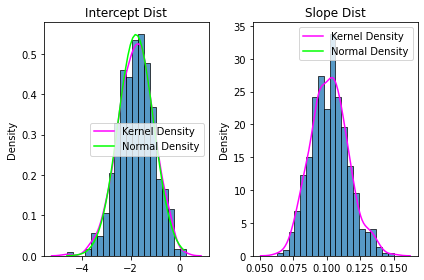

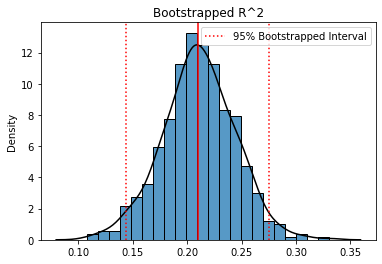

--- sigma hat ---
estimate:		4.6079
std error:		0.54397
median:			4.6073
2.5 percentile:		3.6316
97.5 percentile:	5.7283


In [72]:
# Next the distributions of the estimates

# For plotting normal PDFs
b1_range = np.arange(np.min(boot_b1), np.max(boot_b1), 0.1)
b2_range = np.arange(np.min(boot_b2), np.max(boot_b2), 0.1)

# Plotting beta estimates
fig6, ax6 = plt.subplots(1, 2)
sns.histplot(boot_b1, stat='density', kde=False, ax=ax6[0])
sns.kdeplot(boot_b1, color='fuchsia', ax=ax6[0], label='Kernel Density')
sns.lineplot(x=b1_range, y=norm.pdf(b1_range, np.mean(boot_b1), np.std(boot_b1)), color='lime',ax=ax6[0], label='Normal Density')
ax6[0].set_title('Intercept Dist')
sns.histplot(boot_b2, stat='density', kde=False, ax=ax6[1])
sns.kdeplot(boot_b2, color='fuchsia', ax=ax6[1], label='Kernel Density')
sns.lineplot(x=b2_range, y=norm.pdf(b2_range, np.mean(boot_b2), np.std(boot_b2)), color='lime',ax=ax6[1], label='Normal Density')
ax6[1].set_title('Slope Dist')
plt.tight_layout()
plt.show()

# Bootstrap for distribution of R^2 (coefficient of determination)
sns.histplot(boot_r2, stat='density', kde=False)
sns.kdeplot(boot_r2, color='black')
plt.axvline(x=np.quantile(boot_r2, q=0.025), color='red', linestyle=':', label='95% Bootstrapped Interval')
plt.axvline(x=np.quantile(boot_r2, q=0.5), color='red')
plt.axvline(x=np.quantile(boot_r2, q=0.975), color='red', linestyle=':')
plt.title('Bootstrapped R^2')
plt.legend()
plt.show()

# Bootstrap for estimated residual standard deviation
boot_stdhat = np.sqrt(boot_sig2hat)
print('--- sigma hat ---\n' +
      f'estimate:\t\t{boot_stdhat.mean():.5}\n' +
      f'std error:\t\t{boot_stdhat.std():.5}\n' +
      f'median:\t\t\t{np.quantile(boot_stdhat, q=0.5):.5}\n' +
      f'2.5 percentile:\t\t{np.quantile(boot_stdhat, q=0.025):.5}\n' +
      f'97.5 percentile:\t{np.quantile(boot_stdhat, q=0.975):.5}'
      )

## Transformed Models

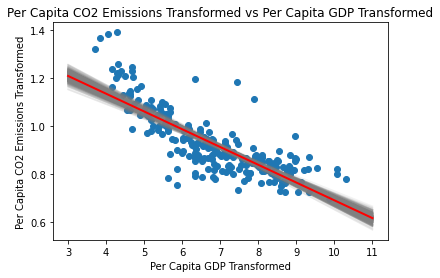

In [73]:
# Model 1 Transformed Model (Per capita GDP Transformed)

random.seed(90095)
n_boot = 500 # number of bootstraps

# initializations
boot_rmse = []
boot_b1 = []
boot_b2 = []
boot_sig2hat = [] # sigma^2 hat estimates (or std error ^2)
boot_r2 = [] # R^2 (no need to adjust)

per_capita_gdp_transformed_span_x = pd.DataFrame({'per_capita_gdp_transformed':np.linspace(3, 11, 200)}) # x spanning 3.5 through 34 for graphing

for iter in range(n_boot):
   # Sampling with replacement
   raw_data_cleaned_sample = raw_data_cleaned.sample(n=raw_data_cleaned.shape[0], replace=True) # `sample` method for pandas DataFrame
   raw_data_cleaned_sample_ols = smf.ols('per_capita_co2_emissions_transformed ~ per_capita_gdp_transformed', data=raw_data_cleaned_sample).fit() # fit model

   # Append coefficients
   boot_b1.append(raw_data_cleaned_sample_ols.params[0])          # intercept
   boot_b2.append(raw_data_cleaned_sample_ols.params[1])          # slope
   # Performance measures
   boot_sig2hat.append(raw_data_cleaned_sample_ols.scale)         # scale = estimated sigma^2
   boot_rmse.append(np.sqrt(np.mean(raw_data_cleaned_sample_ols.resid ** 2))) # RMSE
   boot_r2.append(raw_data_cleaned_sample_ols.rsquared)           # R^2

   # Plot a greyed out line for this iteration
   raw_data_cleaned_sample_yhat = raw_data_cleaned_sample_ols.predict(per_capita_gdp_transformed_span_x)
   plt.plot(per_capita_gdp_transformed_span_x, raw_data_cleaned_sample_yhat, color='grey', alpha=0.1)

# Fit averaged model
raw_data_cleaned_ols_span_y = np.mean(boot_b1) + per_capita_gdp_transformed_span_x * np.mean(boot_b2)

# Plotting the fitted lines
plt.scatter( raw_data_cleaned['per_capita_gdp_transformed'], raw_data_cleaned['per_capita_co2_emissions_transformed'])
plt.plot(per_capita_gdp_transformed_span_x, raw_data_cleaned_ols_span_y, color='r', linewidth=2)
plt.xlabel('Per Capita GDP Transformed')
plt.ylabel('Per Capita CO2 Emissions Transformed')
plt.title('Per Capita CO2 Emissions Transformed vs Per Capita GDP Transformed')
plt.show()

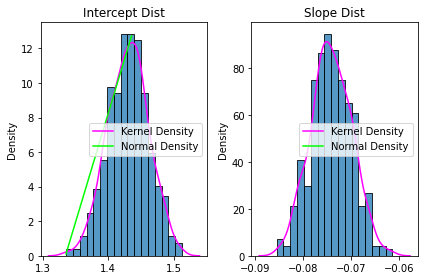

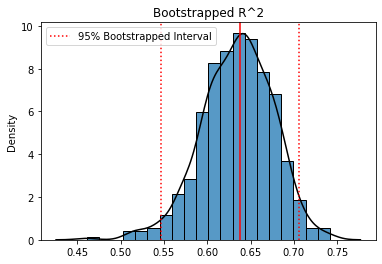

--- sigma hat ---
estimate:		0.080374
std error:		0.005258
median:			0.080113
2.5 percentile:		0.070489
97.5 percentile:	0.091317


In [74]:
# Next the distributions of the estimates

# For plotting normal PDFs
b1_range = np.arange(np.min(boot_b1), np.max(boot_b1), 0.1)
b2_range = np.arange(np.min(boot_b2), np.max(boot_b2), 0.1)

# Plotting beta estimates
fig6, ax6 = plt.subplots(1, 2)
sns.histplot(boot_b1, stat='density', kde=False, ax=ax6[0])
sns.kdeplot(boot_b1, color='fuchsia', ax=ax6[0], label='Kernel Density')
sns.lineplot(x=b1_range, y=norm.pdf(b1_range, np.mean(boot_b1), np.std(boot_b1)), color='lime',ax=ax6[0], label='Normal Density')
ax6[0].set_title('Intercept Dist')
sns.histplot(boot_b2, stat='density', kde=False, ax=ax6[1])
sns.kdeplot(boot_b2, color='fuchsia', ax=ax6[1], label='Kernel Density')
sns.lineplot(x=b2_range, y=norm.pdf(b2_range, np.mean(boot_b2), np.std(boot_b2)), color='lime',ax=ax6[1], label='Normal Density')
ax6[1].set_title('Slope Dist')
plt.tight_layout()
plt.show()

# Bootstrap for distribution of R^2 (coefficient of determination)
sns.histplot(boot_r2, stat='density', kde=False)
sns.kdeplot(boot_r2, color='black')
plt.axvline(x=np.quantile(boot_r2, q=0.025), color='red', linestyle=':', label='95% Bootstrapped Interval')
plt.axvline(x=np.quantile(boot_r2, q=0.5), color='red')
plt.axvline(x=np.quantile(boot_r2, q=0.975), color='red', linestyle=':')
plt.title('Bootstrapped R^2')
plt.legend()
plt.show()

# Bootstrap for estimated residual standard deviation
boot_stdhat = np.sqrt(boot_sig2hat)
print('--- sigma hat ---\n' +
      f'estimate:\t\t{boot_stdhat.mean():.5}\n' +
      f'std error:\t\t{boot_stdhat.std():.5}\n' +
      f'median:\t\t\t{np.quantile(boot_stdhat, q=0.5):.5}\n' +
      f'2.5 percentile:\t\t{np.quantile(boot_stdhat, q=0.025):.5}\n' +
      f'97.5 percentile:\t{np.quantile(boot_stdhat, q=0.975):.5}'
      )

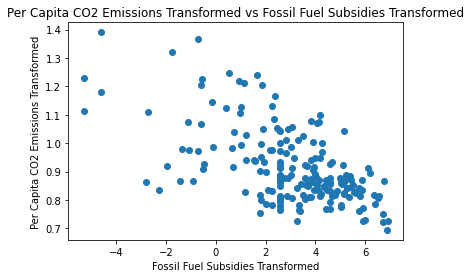

In [75]:
# Model 2 Transformed Model (Fossil Fuel Subsidies Transformed)

random.seed(90095)
n_boot = 500 # number of bootstraps

# initializations
boot_rmse = []
boot_b1 = []
boot_b2 = []
boot_sig2hat = [] # sigma^2 hat estimates (or std error ^2)
boot_r2 = [] # R^2 (no need to adjust)

fossil_fuel_subsidies_transformed_span_x = pd.DataFrame({'fossil_fuel_subsidies_transformed':np.linspace(-100, 100, 200)}) 

for iter in range(n_boot):
   # Sampling with replacement
   raw_data_cleaned_sample = raw_data_cleaned.sample(n=raw_data_cleaned.shape[0], replace=True) # `sample` method for pandas DataFrame
   raw_data_cleaned_sample_ols = smf.ols('per_capita_co2_emissions_transformed ~ fossil_fuel_subsidies_transformed', data=raw_data_cleaned_sample).fit() # fit model

   # Append coefficients
   boot_b1.append(raw_data_cleaned_sample_ols.params[0])          # intercept
   boot_b2.append(raw_data_cleaned_sample_ols.params[1])          # slope
   # Performance measures
   boot_sig2hat.append(raw_data_cleaned_sample_ols.scale)         # scale = estimated sigma^2
   boot_rmse.append(np.sqrt(np.mean(raw_data_cleaned_sample_ols.resid ** 2))) # RMSE
   boot_r2.append(raw_data_cleaned_sample_ols.rsquared)           # R^2

   # Plot a greyed out line for this iteration
   raw_data_cleaned_sample_yhat = raw_data_cleaned_sample_ols.predict(fossil_fuel_subsidies_transformed_span_x)
   plt.plot(fossil_fuel_subsidies_transformed_span_x, raw_data_cleaned_sample_yhat, color='grey', alpha=0.1)

# Fit averaged model
raw_data_cleaned_ols_span_y = np.mean(boot_b1) + fossil_fuel_subsidies_transformed_span_x * np.mean(boot_b2)

# Plotting the fitted lines
plt.scatter( raw_data_cleaned['fossil_fuel_subsidies_transformed'], raw_data_cleaned['per_capita_co2_emissions_transformed'])
plt.plot(fossil_fuel_subsidies_transformed_span_x, raw_data_cleaned_ols_span_y, color='r', linewidth=2)
plt.xlabel('Fossil Fuel Subsidies Transformed')
plt.ylabel('Per Capita CO2 Emissions Transformed')
plt.title('Per Capita CO2 Emissions Transformed vs Fossil Fuel Subsidies Transformed')
plt.show()

In [76]:
# Next the distributions of the estimates

# For plotting normal PDFs
b1_range = np.arange(np.min(boot_b1), np.max(boot_b1), 0.1)
b2_range = np.arange(np.min(boot_b2), np.max(boot_b2), 0.1)

# Plotting beta estimates
fig6, ax6 = plt.subplots(1, 2)
sns.histplot(boot_b1, stat='density', kde=False, ax=ax6[0])
sns.kdeplot(boot_b1, color='fuchsia', ax=ax6[0], label='Kernel Density')
sns.lineplot(x=b1_range, y=norm.pdf(b1_range, np.mean(boot_b1), np.std(boot_b1)), color='lime',ax=ax6[0], label='Normal Density')
ax6[0].set_title('Intercept Dist')
sns.histplot(boot_b2, stat='density', kde=False, ax=ax6[1])
sns.kdeplot(boot_b2, color='fuchsia', ax=ax6[1], label='Kernel Density')
sns.lineplot(x=b2_range, y=norm.pdf(b2_range, np.mean(boot_b2), np.std(boot_b2)), color='lime',ax=ax6[1], label='Normal Density')
ax6[1].set_title('Slope Dist')
plt.tight_layout()
plt.show()

# Bootstrap for distribution of R^2 (coefficient of determination)
sns.histplot(boot_r2, stat='density', kde=False)
sns.kdeplot(boot_r2, color='black')
plt.axvline(x=np.quantile(boot_r2, q=0.025), color='red', linestyle=':', label='95% Bootstrapped Interval')
plt.axvline(x=np.quantile(boot_r2, q=0.5), color='red')
plt.axvline(x=np.quantile(boot_r2, q=0.975), color='red', linestyle=':')
plt.title('Bootstrapped R^2')
plt.legend()
plt.show()

# Bootstrap for estimated residual standard deviation
boot_stdhat = np.sqrt(boot_sig2hat)
print('--- sigma hat ---\n' +
      f'estimate:\t\t{boot_stdhat.mean():.5}\n' +
      f'std error:\t\t{boot_stdhat.std():.5}\n' +
      f'median:\t\t\t{np.quantile(boot_stdhat, q=0.5):.5}\n' +
      f'2.5 percentile:\t\t{np.quantile(boot_stdhat, q=0.025):.5}\n' +
      f'97.5 percentile:\t{np.quantile(boot_stdhat, q=0.975):.5}'
      )

ValueError: arange: cannot compute length

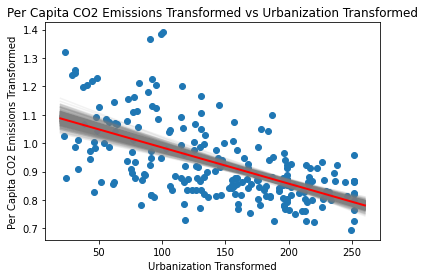

In [77]:
# Model 3 Transformed Model (Urbanization Transformed)

random.seed(90095)
n_boot = 500 # number of bootstraps

# initializations
boot_rmse = []
boot_b1 = []
boot_b2 = []
boot_sig2hat = [] # sigma^2 hat estimates (or std error ^2)
boot_r2 = [] # R^2 (no need to adjust)

Urbanization_transformed_span_x = pd.DataFrame({'Urbanization_transformed':np.linspace(20, 260, 200)}) 

for iter in range(n_boot):
   # Sampling with replacement
   raw_data_cleaned_sample = raw_data_cleaned.sample(n=raw_data_cleaned.shape[0], replace=True) # `sample` method for pandas DataFrame
   raw_data_cleaned_sample_ols = smf.ols('per_capita_co2_emissions_transformed ~ Urbanization_transformed', data=raw_data_cleaned_sample).fit() # fit model

   # Append coefficients
   boot_b1.append(raw_data_cleaned_sample_ols.params[0])          # intercept
   boot_b2.append(raw_data_cleaned_sample_ols.params[1])          # slope
   # Performance measures
   boot_sig2hat.append(raw_data_cleaned_sample_ols.scale)         # scale = estimated sigma^2
   boot_rmse.append(np.sqrt(np.mean(raw_data_cleaned_sample_ols.resid ** 2))) # RMSE
   boot_r2.append(raw_data_cleaned_sample_ols.rsquared)           # R^2

   # Plot a greyed out line for this iteration
   raw_data_cleaned_sample_yhat = raw_data_cleaned_sample_ols.predict(Urbanization_transformed_span_x)
   plt.plot(Urbanization_transformed_span_x, raw_data_cleaned_sample_yhat, color='grey', alpha=0.1)

# Fit averaged model
raw_data_cleaned_ols_span_y = np.mean(boot_b1) + Urbanization_transformed_span_x * np.mean(boot_b2)

# Plotting the fitted lines
plt.scatter( raw_data_cleaned['Urbanization_transformed'], raw_data_cleaned['per_capita_co2_emissions_transformed'])
plt.plot(Urbanization_transformed_span_x, raw_data_cleaned_ols_span_y, color='r', linewidth=2)
plt.xlabel('Urbanization Transformed')
plt.ylabel('Per Capita CO2 Emissions Transformed')
plt.title('Per Capita CO2 Emissions Transformed vs Urbanization Transformed')
plt.show()

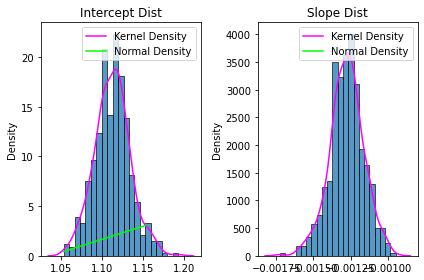

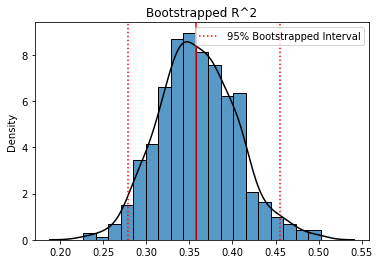

--- sigma hat ---
estimate:		0.10657
std error:		0.0062562
median:			0.10635
2.5 percentile:		0.094838
97.5 percentile:	0.1186


In [78]:
# Next the distributions of the estimates

# For plotting normal PDFs
b1_range = np.arange(np.min(boot_b1), np.max(boot_b1), 0.1)
b2_range = np.arange(np.min(boot_b2), np.max(boot_b2), 0.1)

# Plotting beta estimates
fig6, ax6 = plt.subplots(1, 2)
sns.histplot(boot_b1, stat='density', kde=False, ax=ax6[0])
sns.kdeplot(boot_b1, color='fuchsia', ax=ax6[0], label='Kernel Density')
sns.lineplot(x=b1_range, y=norm.pdf(b1_range, np.mean(boot_b1), np.std(boot_b1)), color='lime',ax=ax6[0], label='Normal Density')
ax6[0].set_title('Intercept Dist')
sns.histplot(boot_b2, stat='density', kde=False, ax=ax6[1])
sns.kdeplot(boot_b2, color='fuchsia', ax=ax6[1], label='Kernel Density')
sns.lineplot(x=b2_range, y=norm.pdf(b2_range, np.mean(boot_b2), np.std(boot_b2)), color='lime',ax=ax6[1], label='Normal Density')
ax6[1].set_title('Slope Dist')
plt.tight_layout()
plt.show()

# Bootstrap for distribution of R^2 (coefficient of determination)
sns.histplot(boot_r2, stat='density', kde=False)
sns.kdeplot(boot_r2, color='black')
plt.axvline(x=np.quantile(boot_r2, q=0.025), color='red', linestyle=':', label='95% Bootstrapped Interval')
plt.axvline(x=np.quantile(boot_r2, q=0.5), color='red')
plt.axvline(x=np.quantile(boot_r2, q=0.975), color='red', linestyle=':')
plt.title('Bootstrapped R^2')
plt.legend()
plt.show()

# Bootstrap for estimated residual standard deviation
boot_stdhat = np.sqrt(boot_sig2hat)
print('--- sigma hat ---\n' +
      f'estimate:\t\t{boot_stdhat.mean():.5}\n' +
      f'std error:\t\t{boot_stdhat.std():.5}\n' +
      f'median:\t\t\t{np.quantile(boot_stdhat, q=0.5):.5}\n' +
      f'2.5 percentile:\t\t{np.quantile(boot_stdhat, q=0.025):.5}\n' +
      f'97.5 percentile:\t{np.quantile(boot_stdhat, q=0.975):.5}'
      )